In [42]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from matplotlib.lines import Line2D


%matplotlib inline

In [43]:
def format():
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    plt.xscale('log')
    plt.yscale('log')
    plt.figure(figsize=(6,6))
    return

In [44]:
sample_primordial = pd.read_csv('all_planets.csv')

sample_primordial.describe()


,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5756.000000,5756.000000,5756.000000,5756.000000,5.480000e+03,4.979000e+03,4.979000e+03,5480.000000,5475.000000,2863.000000,...,5422.000000,5517.000000,5509.000000,5503.000000,5526.000000,5490.000000,5478.000000,5469.000000,5467.000000,5467.000000
mean,1.104065,1.766157,2016.415566,0.005212,7.805236e+04,9.612077e+04,-2.195251e+04,-0.000730,16.039629,2.356508,...,-0.052833,12.605862,0.100670,-0.102275,10.463569,0.042592,-0.042613,12.319828,0.000642,-0.000642
std,0.344414,1.150624,4.651429,0.072012,5.432986e+06,6.661132e+06,1.419306e+06,0.038205,359.828197,97.483155,...,0.260714,3.088077,0.138744,0.207147,3.022716,0.261055,0.267160,2.985630,0.001822,0.001822
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-16.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232
25%,1.000000,1.000000,2014.000000,0.000000,4.417637e+00,1.400000e-05,-1.572000e-03,0.000000,0.052900,0.000860,...,-0.045338,10.769000,0.030000,-0.126000,8.449000,0.020000,-0.031000,10.454000,0.000257,-0.000538
50%,1.000000,1.000000,2016.000000,0.000000,1.139097e+01,9.392000e-05,-9.543000e-05,0.000000,0.102900,0.002700,...,-0.030159,13.403000,0.080000,-0.080000,11.311500,0.023000,-0.023000,13.148000,0.000364,-0.000364
75%,1.000000,2.000000,2020.000000,0.000000,4.043137e+01,1.552000e-03,-1.400000e-05,0.000000,0.300400,0.034000,...,-0.022198,14.986000,0.126000,-0.030000,12.814000,0.031000,-0.020000,14.755500,0.000538,-0.000257
max,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,5205.000000,...,-0.011737,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118


### **m sin i x orbital semi-major axis**

In [45]:
plot1 = sample_primordial[sample_primordial['pl_orbsmax'] != 0] #com medida de semi orbit
plot1 = plot1[plot1['pl_bmassj'] != 0]

low_mass =  plot1[plot1['pl_bmassj'] >= 13]
radv_st = low_mass[low_mass['discoverymethod'] == 'Radial Velocity']
trasnit_st = low_mass[low_mass['discoverymethod'] == 'Transit']
micro_st = low_mass[low_mass['discoverymethod'] == 'Microlensing']
imagins_st = low_mass[low_mass['discoverymethod'] == 'Imaging']

plot1 = plot1[plot1['pl_bmassj'] < 13]
radv = plot1[plot1['discoverymethod'] == 'Radial Velocity']
trasnit = plot1[plot1['discoverymethod'] == 'Transit']
micro = plot1[plot1['discoverymethod'] == 'Microlensing']
imagins = plot1[plot1['discoverymethod'] == 'Imaging']

C:\Users\ylana\AppData\Local\Temp\ipykernel_18852\1026915943.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10000)


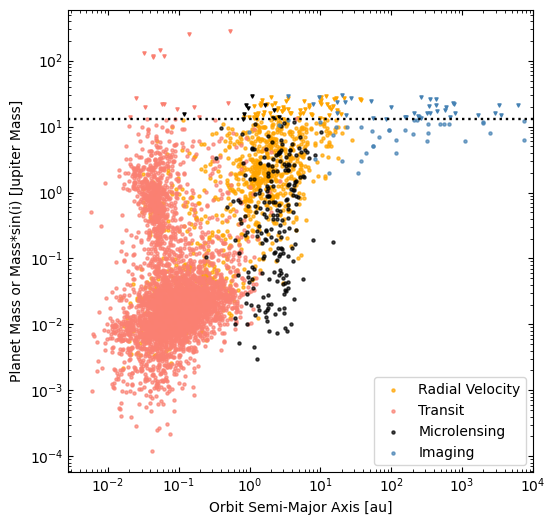

In [46]:
plt.figure(figsize=(6,6))

#plt.scatter(low_mass['pl_orbsmax'], low_mass['pl_bmassj'], s = 1, marker = 'v')
plt.scatter(radv_st['pl_orbsmax'], radv_st['pl_bmassj'], s = 5, marker = 'v', c = 'orange')
plt.scatter(trasnit_st['pl_orbsmax'], trasnit_st['pl_bmassj'], s = 5, marker = 'v', c = 'salmon')
plt.scatter(micro_st['pl_orbsmax'], micro_st['pl_bmassj'], s = 5, marker = 'v', c = 'black')
plt.scatter(imagins_st['pl_orbsmax'], imagins_st['pl_bmassj'], s = 5, marker = 'v', c = 'steelblue')


#plt.scatter(plot1['pl_orbsmax'], plot1['pl_bmassj'], s = 5, marker = 'o')
plt.scatter(radv['pl_orbsmax'], radv['pl_bmassj'], s = 5, marker = 'o', c = 'orange', alpha = 0.7, ec = 'orange', label = 'Radial Velocity')
plt.scatter(trasnit['pl_orbsmax'], trasnit['pl_bmassj'], s = 5, marker = 'o', c = 'salmon', alpha = 0.7, ec = 'salmon', label = 'Transit')
plt.scatter(micro['pl_orbsmax'], micro['pl_bmassj'], s = 5, marker = 'o', c = 'black', alpha = 0.7, ec = 'black', label = 'Microlensing')
plt.scatter(imagins['pl_orbsmax'], imagins['pl_bmassj'], s = 5, marker = 'o', c = 'steelblue', alpha = 0.7, ec = 'steelblue', label = 'Imaging')


plt.hlines(13,0,10000, color = 'black', linestyle = ':', linewidth=1.7)
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Orbit Semi-Major Axis [au]')
plt.ylabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.xlim(0,10000)
plt.legend()
plt.show()

legenda: dashed line é o limite de queima de hidrogenio. triangulos são o q provavelmente são anas marrom. (log vs log) 

### **distribuição de massa -> histograma**

In [47]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

In [48]:
plot2 = sample_primordial[sample_primordial['pl_bmasse'] != 0]
plot2 = plot2[plot2['pl_bmasse'] < 20]
teste = plot2['pl_bmasse'].dropna()

In [49]:
num_bins = freedman_diaconis_bins(teste)
print("Number of bins (Freedman-Diaconis Rule):", num_bins)

Number of bins (Freedman-Diaconis Rule): 28


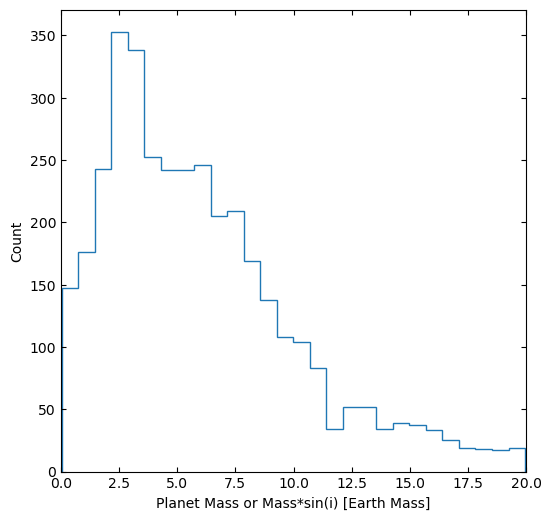

In [50]:
plt.figure(figsize=(6,6))
h, edges = np.histogram(teste,bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
plt.xlim(0,20)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Planet Mass or Mass*sin(i) [Earth Mass]')
plt.show()

### **distribuição de raio -> histograma**

In [51]:
plot3 = sample_primordial[sample_primordial['pl_rade'] != 0]

plot3_2 = plot3[plot3['pl_rade'] < 10]

plot3_2 = plot3_2['pl_rade'].dropna()
plot3 = plot3['pl_rade'].dropna()

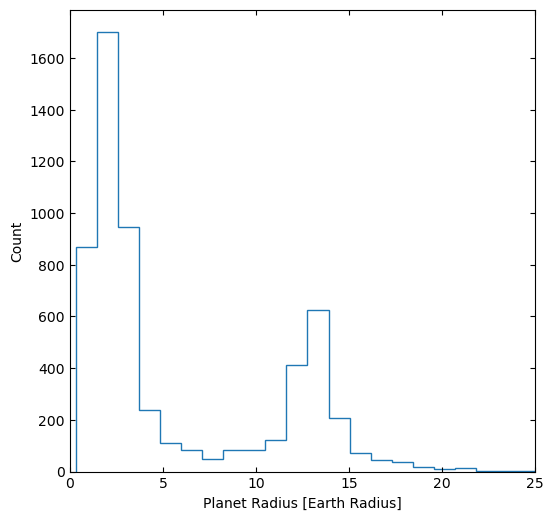

In [52]:
num_bins = freedman_diaconis_bins(plot3)

## all planets
plt.figure(figsize=(6,6))
h, edges = np.histogram(plot3,bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
plt.xlim(0,25)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
plt.show()

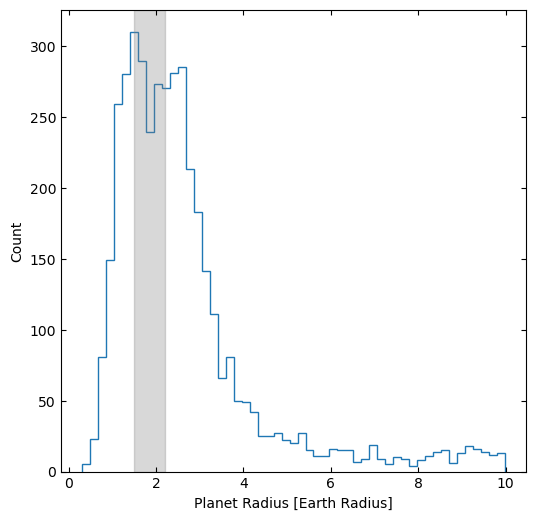

In [53]:
## looking closer to sub-neptunes

num_bins = freedman_diaconis_bins(plot3_2)

## plotando figura

plt.figure(figsize=(6,6))
h, edges = np.histogram(plot3_2,bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
#plt.xlim(0,20)
plt.axvspan(1.5, 2.2, alpha=0.3, color='gray')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
plt.show()


### **Plot Raio x massa c/ erros**

In [54]:
plot4 = sample_primordial[sample_primordial['pl_bmassj'] != 0 ]
plot4 = plot4[plot4['pl_radj'] != 0 ]

plot4 = plot4.dropna(subset=['pl_bmassj', 'pl_radj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_radjerr1', 'pl_radjerr2'])



In [55]:

xerrmax = plot4['pl_bmassjerr1']
xerrmin = plot4['pl_bmassjerr2']

xerror = [xerrmax, abs(xerrmin)]

yerrmax = plot4['pl_radjerr1']
yerrmin = plot4['pl_radjerr2']

yerror = [yerrmax, abs(yerrmin)]

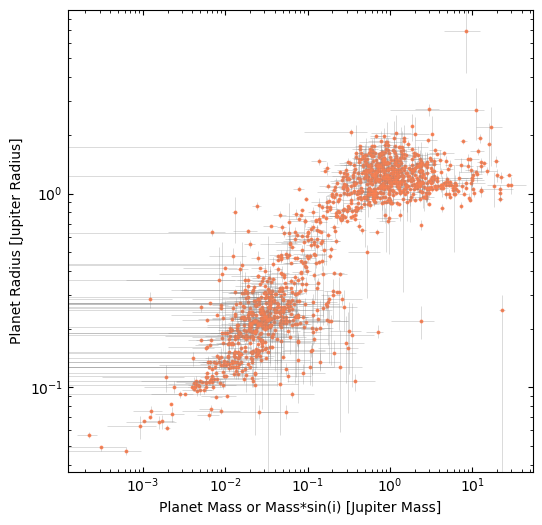

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(plot4['pl_bmassj'], plot4['pl_radj'], s = 2, c = 'coral')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

plt.errorbar(plot4['pl_bmassj'], plot4['pl_radj'], xerr= xerror, yerr= yerror, fmt= 'o', ecolor='gray', elinewidth=0.5, alpha = .4, mfc = 'coral', mew = 0, ms = 3, )
plt.ylabel('Planet Radius [Jupiter Radius]')
plt.xlabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.show()

### **Eccentricity vs Orbital period** 
-> shows decrease in eccentricity caused by tidal interactions

In [57]:
plot5 = sample_primordial[sample_primordial['pl_orbeccen'] != 0]
plot5 = plot5[plot5['pl_orbper'] != 0]

plot5 = plot5.dropna(subset=['pl_orbeccen', 'pl_orbper'])

In [58]:
## subsets
res1 = plot5[plot5['pl_bmassj'] < 6e-3]
res2 = plot5[(plot5['pl_bmassj'] > 6.311e-3) & (plot5['pl_bmassj'] < 0.408)]
res3 = plot5[(plot5['pl_bmassj'] > 0.4) & (plot5['pl_bmassj'] < 29.041)]

C:\Users\ylana\AppData\Local\Temp\ipykernel_18852\3672275246.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e5)


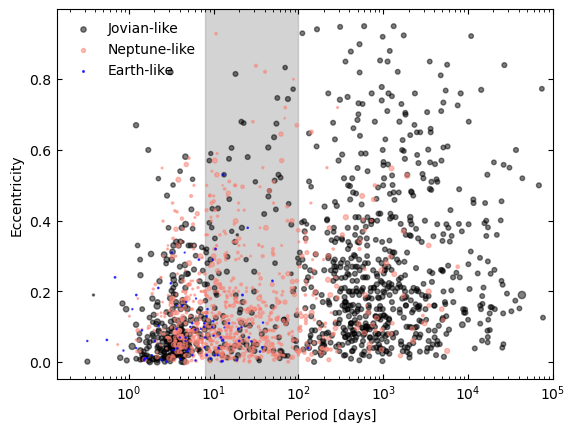

In [59]:
#plt.scatter(plot5['pl_orbper'], plot5['pl_orbeccen'], s = 5, c = 'salmon', marker = '.')

plt.axvspan(8, 100, alpha=0.5, color='darkgray')

plt.scatter(res3['pl_orbper'], res3['pl_orbeccen'], s =  res3['pl_radj'] * 10, c = 'black', marker = 'o', alpha = 0.5, label = 'Jovian-like') ## jupiters
plt.scatter(res2['pl_orbper'], res2['pl_orbeccen'], s =  res2['pl_radj'] * 10, c = 'salmon', marker = 'o',alpha = 0.5, label = 'Neptune-like') ## netunos
plt.scatter(res1['pl_orbper'], res1['pl_orbeccen'], s = res1['pl_radj'] * 10, c = 'blue', marker = 'o', alpha = 0.7, label = 'Earth-like') ## terras
#plt.scatter(mini_nep['pl_orbper'], mini_nep['pl_orbeccen'], s = mini_nep['pl_radj'] * 10, c = 'yellow', marker = 'o', label = 'mininep') ## terras


plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.xlim(0,1e5)
plt.xlabel('Orbital Period [days]')
plt.ylabel('Eccentricity')
plt.legend(frameon=False)
plt.show()

In [60]:
bins_e = freedman_diaconis_bins(plot5['pl_orbeccen'])
bins_orb = freedman_diaconis_bins(plot5['pl_orbper'])

87

In [122]:
data = plot5['pl_orbper']

bins_orb = np.logspace(np.log10(data.min()), np.log10(data.max()), num=87)
bins_e = int(2 * np.sqrt(len(plot5['pl_orbper'])))



87

C:\Users\ylana\AppData\Local\Temp\ipykernel_18852\922680030.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,3e5)


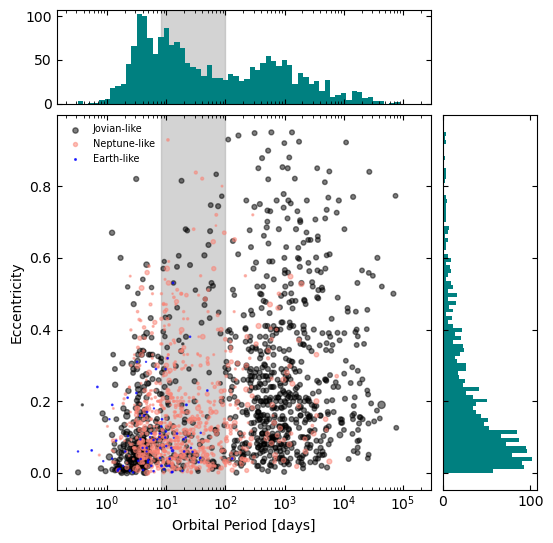

In [146]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.axvspan(8, 100, alpha=0.5, color='darkgray')
ax_histx.axvspan(8, 100, alpha=0.5, color='darkgray')


ax.scatter(res3['pl_orbper'], res3['pl_orbeccen'], s =  res3['pl_radj'] * 10, c = 'black', marker = 'o', alpha = 0.5, label = 'Jovian-like') ## jupiters
ax.scatter(res2['pl_orbper'], res2['pl_orbeccen'], s =  res2['pl_radj'] * 10, c = 'salmon', marker = 'o',alpha = 0.5, label = 'Neptune-like') ## netunos
ax.scatter(res1['pl_orbper'], res1['pl_orbeccen'], s = res1['pl_radj'] * 10, c = 'blue', marker = 'o', alpha = 0.7, label = 'Earth-like') ## terras
ax.legend(fontsize = 7,frameon = False)
ax.set_xlabel('Orbital Period [days]')
ax.set_ylabel('Eccentricity')


ax.set_xscale('log')
ax.set_xlim(0,3e5)
ax.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
ax_histy.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)


ax_histx.hist(plot5['pl_orbper'], bins=bins_orb, color = 'teal')
ax_histy.hist(plot5['pl_orbeccen'], bins=bins_e, orientation='horizontal', color = 'teal')
ax_histx.set_xscale('log')

plt.show()


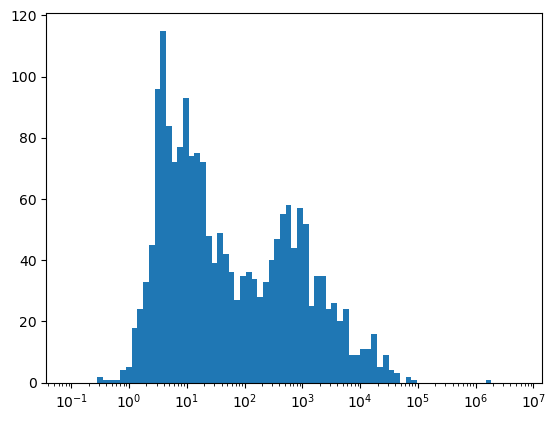

In [116]:
data = plot5['pl_orbper']
bin_edges = np.logspace(np.log10(data.min()), np.log10(data.max()), num=80)  # Adjust `num` for more or fewer bins


plt.hist(plot5['pl_orbper'], bins=bin_edges)
plt.xscale('log')
plt.show()


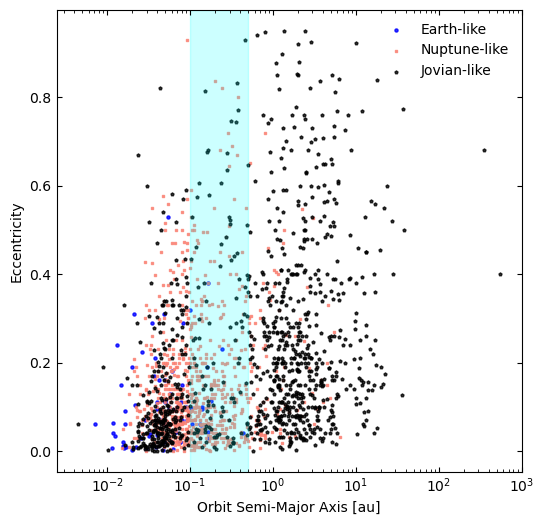

In [62]:
plt.figure(figsize=(6,6))
#plt.scatter(plot5['pl_orbper'], plot5['pl_orbeccen'], s = 5, c = 'salmon', marker = '.')


plt.scatter(res1['pl_orbsmax'], res1['pl_orbeccen'], s = 5, c = 'blue', marker = 'o', alpha = 0.8, label = 'Earth-like') ## terras
plt.scatter(res2['pl_orbsmax'], res2['pl_orbeccen'], s = 4, c = 'salmon', marker = 's',alpha = 0.8, label = 'Nuptune-like') ## netunos
plt.scatter(res3['pl_orbsmax'], res3['pl_orbeccen'], s = 5, c = 'black', marker = 'p', alpha = 0.8, label = 'Jovian-like') ## jupiters

plt.axvspan(0.1, 0.5, alpha=0.2, color='aqua')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.xlabel('Orbit Semi-Major Axis [au]')
plt.ylabel('Eccentricity')
plt.legend(frameon=False)
plt.show()

Orb period x planet radius

In [63]:
plot7 = sample_primordial[sample_primordial['pl_rade'] != 0]
plot7 = plot7[plot7['pl_orbper'] != 0]

plot7 = plot7.dropna(subset=['pl_rade', 'pl_orbper'])

In [64]:
plot7

,pl_name,hostname,pl_letter,hd_name,tic_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_refname,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,b,HD 107383,TIC 72437047,2,1,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,...,-0.219739,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,b,HD 136726,TIC 230061010,1,1,Radial Velocity,2009,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,...,-0.124857,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,b,HD 221345,TIC 333225860,1,1,Radial Velocity,2008,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,...,-0.124501,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,b,HD 145675,TIC 219483057,1,2,Radial Velocity,2002,<a refstr=BUTLER_ET_AL__2003 href=https://ui.a...,...,-0.022596,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,b,HD 186427,TIC 27533327,3,1,Radial Velocity,1996,<a refstr=COCHRAN_ET_AL__1997 href=https://ui....,...,-0.024532,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,ups And b,ups And,b,HD 9826,TIC 189576919,2,3,Radial Velocity,1996,<a refstr=BUTLER_ET_AL__1997 href=https://ui.a...,...,-0.349118,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5752,ups And c,ups And,c,HD 9826,TIC 189576919,2,3,Radial Velocity,1999,<a refstr=BUTLER_ET_AL__1999 href=https://ui.a...,...,-0.349118,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5753,ups And d,ups And,d,HD 9826,TIC 189576919,2,3,Radial Velocity,1999,<a refstr=BUTLER_ET_AL__1999 href=https://ui.a...,...,-0.349118,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5754,ups Leo b,ups Leo,b,NaN,TIC 49430557,1,1,Radial Velocity,2021,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,...,-0.326940,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


C:\Users\ylana\AppData\Local\Temp\ipykernel_18852\3852120250.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10e3)
C:\Users\ylana\AppData\Local\Temp\ipykernel_18852\3852120250.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20)


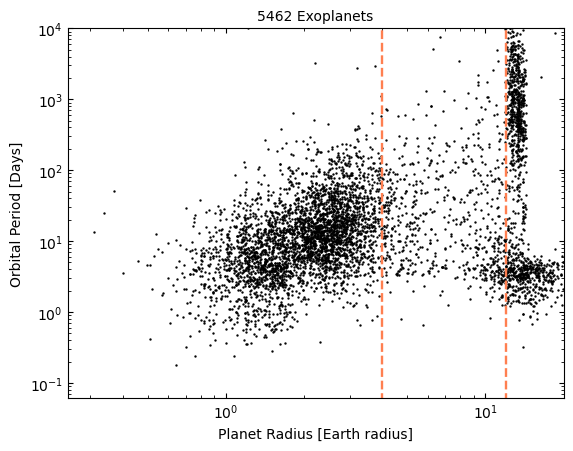

In [65]:
plt.scatter(plot7['pl_rade'],
            plot7['pl_orbper'],
           s = 0.5,
           c = 'black')

plt.vlines(4, 0, 10e4, color = 'coral', linestyle = '--', linewidth=1.7)
plt.vlines(12, 0, 10e4, color = 'coral', linestyle = '--', linewidth=1.7)

plt.yscale("log")
plt.xscale("log")

plt.ylim(0, 10e3)
plt.xlim(0,20)
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.ylabel("Orbital Period [Days]")
plt.xlabel("Planet Radius [Earth radius]")
plt.title("5462 Exoplanets", fontsize = 10)
plt.savefig('radius_porb.png', dpi=500)

lac in the galaxie

In [66]:
from astropy.coordinates import Galactic, CartesianRepresentation
from astropy import units as u
from astropy.coordinates import CartesianRepresentation
from astropy.table import Table


In [67]:
plot6 = Table.read(sample_primordial, format='csv')

In [68]:
sample_primordial['sy_plx'].describe()
## distancia estimativa 1/plx

count    5422.000000
mean       12.552479
std        31.445964
min         0.036766
25%         1.225170
50%         2.701160
75%        10.252200
max       768.500000
Name: sy_plx, dtype: float64

In [69]:
# Define galactic coordinates
l = plot6['glon'] * u.deg  # Galactic longitude
b = plot6['glat'] * u.deg  # Galactic latitude



KeyError: 'glon'

C:\Users\ylana\AppData\Local\Temp\ipykernel_21048\2347195132.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10000)


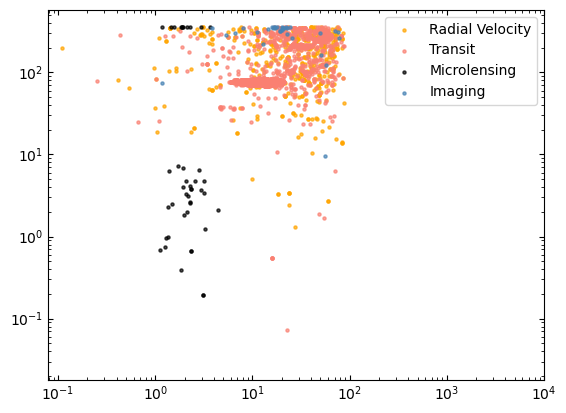

In [27]:
plt.scatter(radv['glat'], radv['glon'], s = 5, marker = 'o', c = 'orange', alpha = 0.7, ec = 'orange', label = 'Radial Velocity')
plt.scatter(trasnit['glat'], trasnit['glon'], s = 5, marker = 'o', c = 'salmon', alpha = 0.7, ec = 'salmon', label = 'Transit')
plt.scatter(micro['glat'], micro['glon'], s = 5, marker = 'o', c = 'black', alpha = 0.7, ec = 'black', label = 'Microlensing')
plt.scatter(imagins['glat'], imagins['glon'], s = 5, marker = 'o', c = 'steelblue', alpha = 0.7, ec = 'steelblue', label = 'Imaging')


plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

#plt.xlabel('Orbit Semi-Major Axis [au]')
#plt.ylabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.xlim(0,10000)
plt.legend()
plt.show()

Next plots:

- eccentricity vs period

- distribuição mettalicities -> comparar as que tem planetas com as que não tem

- loc na galaxia
